## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

#print(mouse_metadata, study_results)
merge_df = pd.merge(mouse_metadata, study_results)
DR = merge_df["Drug Regimen"]
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen
Drug = merge_df.groupby(["Drug Regimen"])

# Grouping by Drug Regime with Tumor Volume
DR_stat = merge_df[["Drug Regimen", "Tumor Volume (mm3)"]]

#Remove duplicates with teh drop function
duplicates = merge_df.drop_duplicates(subset='Mouse ID', keep="first")
DR_stat = DR_stat.drop_duplicates()

# Connect Tumor data to Drug type (Mean, Median, Variance, Std, Sem)
Drug_Regimen_mean = round(Drug["Tumor Volume (mm3)"].mean(),2)
Drug_Regimen_median = round(Drug["Tumor Volume (mm3)"].median(),2)
Drug_Regimen_Variance = round(Drug["Tumor Volume (mm3)"].var(),2)
Drug_Regimen_STD = round(Drug["Tumor Volume (mm3)"].std(),2)
Drug_Regimen_SEM = round(Drug["Tumor Volume (mm3)"].sem(),2)

# Creating DataFrame & setting index
DR_Mean_rows = pd.DataFrame({ "Mean": Drug_Regimen_mean,
                             "Median": Drug_Regimen_median,
                             "Variance": Drug_Regimen_Variance,
                             "STD": Drug_Regimen_STD,
                             "SEM": Drug_Regimen_SEM}) 

#Classify different Drugs Regimens
DR_Mean_rows.index = (['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 
                       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'])
DR_Mean_rows


,Mean,Median,Variance,STD,SEM
Ramicane,40.68,41.56,24.95,4.99,0.33
Capomulin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Placebo,55.24,53.70,68.55,8.28,0.60
Ceftamin,54.33,52.51,66.17,8.13,0.60
Stelasyn,54.03,52.29,61.17,7.82,0.58
Zoniferol,52.32,50.85,42.35,6.51,0.51
Ketapril,40.22,40.67,23.49,4.85,0.32
Propriva,54.23,52.43,59.45,7.71,0.57
Naftisol,53.24,51.82,48.53,6.97,0.52


## Bar plots

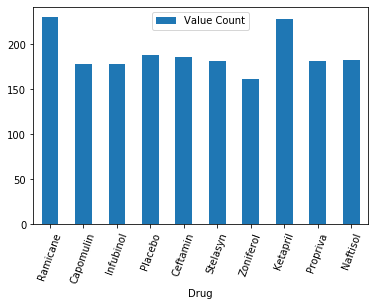

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

Drug_Regimen_count = round(Drug["Tumor Volume (mm3)"].count(),2)
Drug_Regimen = (['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'])

df_pandas = pd.DataFrame({'Drug': Drug_Regimen, 'Value Count': Drug_Regimen_count})
df_pandas.plot.bar(x='Drug', y='Value Count', rot=70)


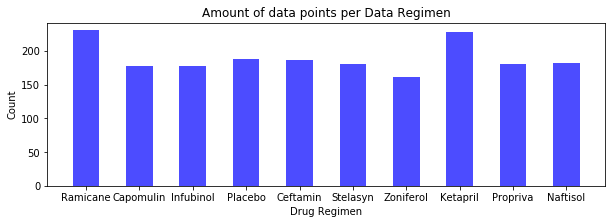

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.figure(figsize=(10,3))
plt.bar(Drug_Regimen, Drug_Regimen_count, width=.5, align='center', color='blue', alpha=.7 )
plt.ylabel('Count')
plt.xlabel('Drug Regimen')
plt.title('Amount of data points per Data Regimen')
plt.show()

## Pie plots

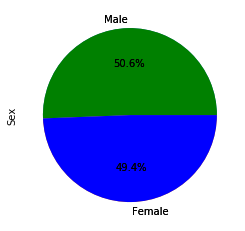

In [120]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Sex = merge_df["Sex"]

#count the amount of mice in the sex data
Gender_df_counts = merge_df.Sex.value_counts()

#Declare the type of plot, and show the percentage
Gender_df_counts.plot(kind="pie",autopct='%1.1f%%')

# add color
color = ['green', 'blue']
#construct and show show the pie chart using pandas
plt.pie(counts.values, colors=color, 
        labels=Gender_df_counts.index.values,autopct='%1.1f%%')
plt.show()



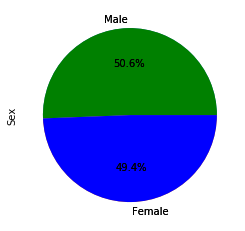

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Declare the type of plot, and show the percentage
Gender_df_counts.plot(kind="pie",autopct='%1.1f%%')

# add color
color = ['green', 'blue']

#count the amount of mice in the sex data
Gender_plot_counts = merge_df.Sex.value_counts()

#construct and show show the pie chart using pyplot
plt.pie(counts.values, colors=color, 
        labels=Gender_plot_counts.index.values, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, outliers and boxplots

In [117]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# The max value of Mouse ID should be used in order to find the highest time
maximum_tumor_data = merge_df.groupby(["Mouse ID"]).max()

#Reset the max value on the mouse id index
maximum_tumor_data = maximum_tumor_data.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
applied_data = maximum_tumor_data[['Mouse ID',
                                  'Timepoint']].merge(merge_df,
                                   on=['Mouse ID','Timepoint'],how="left")

# Declare the max Drug Regimens to the name and tumor volume to see their values
capomulin = applied_data.loc[applied_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ceftamin = applied_data.loc[applied_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']
infubinol = applied_data.loc[applied_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ramicane = applied_data.loc[applied_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Quantitatively determine oultiers for ramicane, infubinol, capomulin, and ceftamin 
capo = capomulin.quantile([.25,.5,.75])
rami = ramicane.quantile([.25,.5,.75])
infu = infubinol.quantile([.25,.5,.75])
ceft = ceftamin.quantile([.25,.5,.75])

# Consider the count for the outlier calculations
capo_low_q = capo[0.25]
capo_up_q = capo[0.75]
rami_low_q = rami[0.25]
rami_up_q = rami[0.75]
infu_low_q = infu[0.25]
infu_up_q = infu[0.75]
ceft_low_q = ceft[0.25]
ceft_up_q = ceft[0.75]

# Subtract the the upper form the lower quantitle
capo_iqr = capo_up_q - capo_low_q
ceft_iqr = ceft_up_q - ceft_low_q
infu_iqr = infu_up_q - infu_low_q
rami_iqr = rami_up_q - rami_low_q

#Subtract new quantitle form lower and upper drug regimen to get bounderies
capo_low_boundaries = capo_low_q - (1.5 * capo_iqr)
capo_up_boundaries = capo_up_q + (1.5 * capo_iqr)
infu_low_boundaries = infu_low_q - (1.5 * infu_iqr)
infu_up_boundaries = infu_up_q + (1.5 * infu_iqr)
rami_low_boundaries = rami_low_q - (1.5 * rami_iqr)
rami_up_boundaries = rami_up_q + (1.5 * rami_iqr)
ceft_low_boundaries = ceft_low_q - (1.5 * ceft_iqr)
ceft_up_boundaries = ceft_up_q + (1.5 * ceft_iqr)

#Print out the located Quantitative boundaries for these three drug regimens
print(f"Capomulin Outliers: { capomulin.loc[(capomulin < capo_low_boundaries) | (capomulin > capo_up_boundaries)]}" )
print(f"Ceftamin outliers: {ceftamin.loc[(ceftamin < ceft_low_boundaries) | (ceftamin > ceft_up_boundaries)]}")
print(f"Ramicane outliers: {ramicane.loc[(ramicane < rami_low_boundaries) | (ramicane > rami_up_boundaries)]}")
print(f"Infubinol outliers: {infubinol.loc[(infubinol < infu_low_boundaries) | (infubinol > infu_up_boundaries)]}")



Capomulin Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


## Line and scatter plots

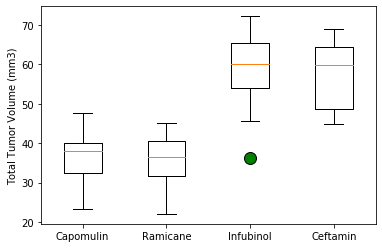

In [99]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Allow the physical perameters to be added for each Drug Regimen
outlier = dict(markerfacecolor='green',markersize=12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],
            labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],
            flierprops=outlier)
plt.ylabel('Total Tumor Volume (mm3)')
plt.show()

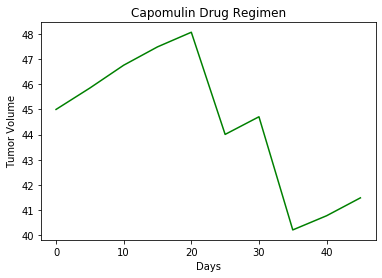

In [104]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Locate the values that just hold id 1509 and Capomulin
capomulin_table = merge_df.loc[merge_df['Drug Regimen'] == "Capomulin"]
mouse_IDdata = merge_df.loc[merge_df['Mouse ID'] == 'l509']

# Create line graph 
plt.plot(mouse_IDdata['Timepoint'],
         mouse_IDdata['Tumor Volume (mm3)'], color='green')
plt.xlabel('Days')
plt.ylabel('Tumor Volume')
plt.title('Capomulin Drug Regimen')
plt.show()

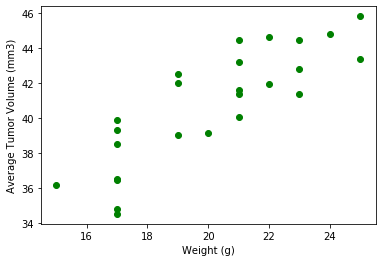

In [123]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Declare the best drug value to Capomilin
best_table = merge_df.loc[merge_df['Drug Regimen'] == "Capomulin"]
best_average = best_table.groupby(['Mouse ID']).mean()

# Provide a scatter plot for the best Drug Regimen
plt.scatter(best_average['Weight (g)'],
            best_average['Tumor Volume (mm3)'], color='green')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation is: 0.84


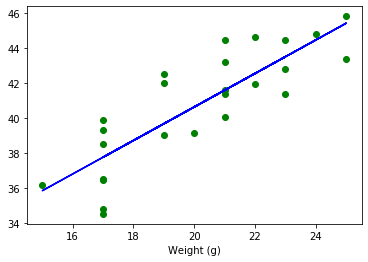

In [124]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(best_average['Weight (g)'],
                                best_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation is: {correlation}")

#Scatter plot demonstates the liner regression between data points
best_graph = st.linregress(best_average['Weight (g)'],best_average['Tumor Volume (mm3)'])
y_values = best_average['Weight (g)'] * best_graph[0] + best_graph[1]

#print scatter plot with line through it
plt.scatter(best_average['Weight (g)'], 
            best_average['Tumor Volume (mm3)'], color='green')
plt.xlabel('Weight (g)')
plt.ylabel
plt.plot(best_average['Weight (g)'], y_values,color="blue")

